In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Поліноміальна регрессія


In [4]:
df=pd.read_csv('F:/data_science_course/git/Lesson_37/Position_Salaries.csv', index_col=0)
df

,Level,Salary
Position,,
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [5]:
x=df.Level
y=df.Salary

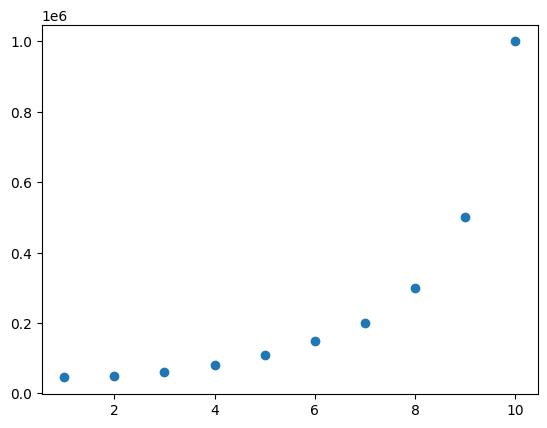

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

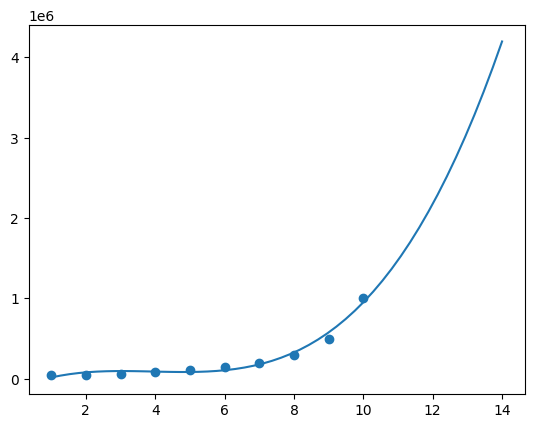

In [47]:
model = np.poly1d(np.polyfit(x,y, 3))
polyline = np.linspace(1,14,50)
plt.scatter(x,y)
plt.plot(polyline, model(polyline))
plt.show()


In [8]:
print(model)

      3             2
4120 x - 4.855e+04 x + 1.807e+05 x - 1.213e+05


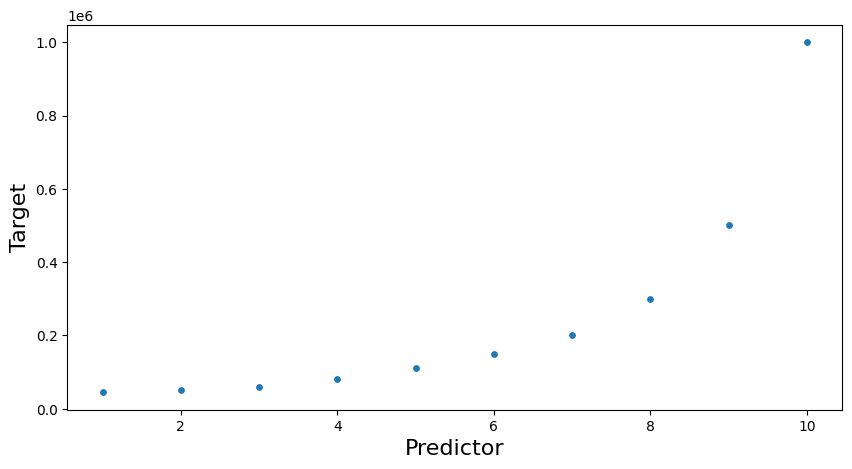

In [112]:
from sklearn.metrics import mean_squared_error


plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.show()

In [113]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

LinearRegression()

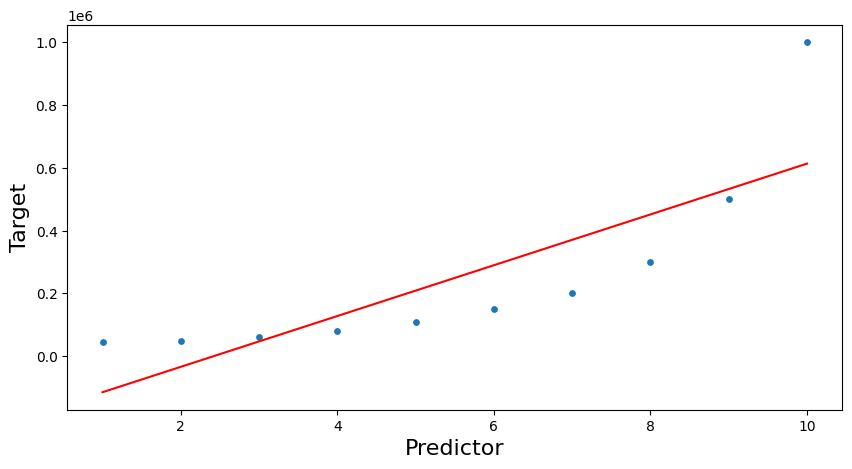

In [114]:
y_pred = lm.predict(x.values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='r')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.show()


In [115]:
print(f'RMSE: {np.sqrt(mean_squared_error(y,y_pred))}')

RMSE: 163388.73519272613


In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline



In [105]:
poly = PolynomialFeatures(degree=20)
Input=[('polynomial', poly), ('modal', LinearRegression())]
pipe = Pipeline(Input)

X_poly = poly.fit_transform(x.values.reshape(-1,1))
print(X_poly)
pipe.fit(X_poly, y.values.reshape(-1,1))

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
  2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
  6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03
  6.56100000e+03 1.96830000e+04 5.90490000e+04 1.77147000e+05
  5.31441000e+05 1.59432300e+06 4.78296900e+06 1.43489070e+07
  4.30467210e+07 1.29140163e+08 3.87420489e+08 1.16226147e+09
  3.48678440e+09]
 [1.00000000e+00

MemoryError: Unable to allocate 19.6 TiB for an array with shape (10, 269128937220) and data type float64

In [108]:
pipe_pred = model.predict(X_poly)


sorted_zip=sorted(zip(x, pipe_pred))
x_poly, poly_pred = zip(*sorted_zip)

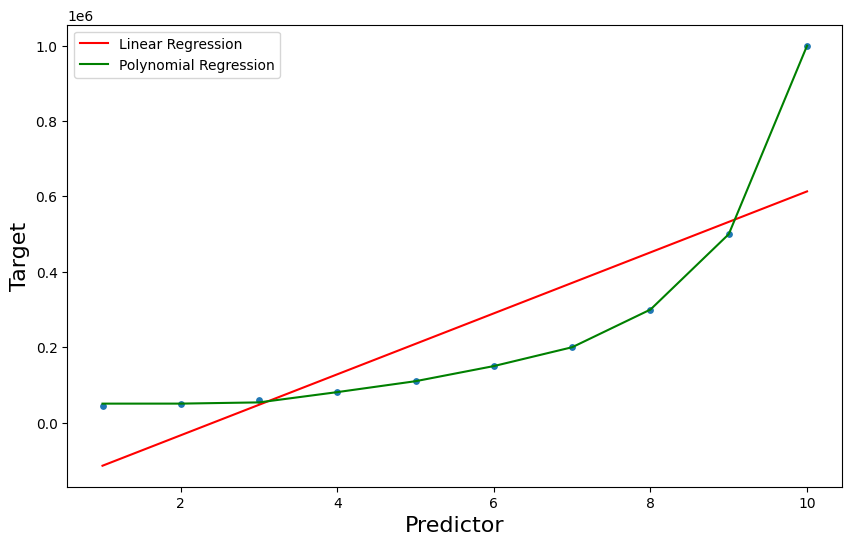

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='r', label='Linear Regression')
plt.plot(x_poly, poly_pred, color='g', label='Polynomial Regression')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.show()

In [110]:
print(f'RMSE: {np.sqrt(mean_squared_error(y,poly_pred))}')

RMSE: 2651.3011755360553


# Регулярізація данних(нормалізація)

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import warnings 
warnings.simplefilter('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
data = genfromtxt('F:/data_science_course/git/Lesson_37/communities.csv', delimiter=',', )

data[np.isnan(data)] = 0
print(data)

[[8.000e+00 0.000e+00 0.000e+00 ... 3.200e-01 1.400e-01 2.000e-01]
 [5.300e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 6.700e-01]
 [2.400e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 4.300e-01]
 ...
 [9.000e+00 9.000e+00 8.007e+04 ... 9.100e-01 2.800e-01 2.300e-01]
 [2.500e+01 1.700e+01 7.260e+04 ... 2.200e-01 1.800e-01 1.900e-01]
 [6.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.300e-01 4.800e-01]]


In [107]:
X= data[:,:-1]

y= data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


In [110]:
lr=LinearRegression().fit(X_train, y_train)

In [112]:
print(f'Linear regression-training set score: {lr.score(X_train,y_train):.2f}')
print(f'Linear regression-test set score: {lr.score(X_test,y_test):.2f}')

Linear regression-training set score: 0.71
Linear regression-test set score: 0.65


# L1

In [132]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.00001).fit(X_train, y_train)
print(f'Linear regression-training set score: {lasso.score(X_train,y_train):.2f}')
print(f'Linear regression-test set score: {lasso.score(X_test,y_test):.2f}')


Linear regression-training set score: 0.71
Linear regression-test set score: 0.65


# L2

In [138]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f'Linear regression-training set score: {ridge.score(X_train,y_train):.2f}')
print(f'Linear regression-test set score: {ridge.score(X_test,y_test):.2f}')


Linear regression-training set score: 0.71
Linear regression-test set score: 0.65


## L1+L2

In [140]:
from sklearn.linear_model import ElasticNet
elastic= ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train,y_train)
print(f'Linear regression-training set score: {elastic.score(X_train,y_train):.2f}')
print(f'Linear regression-test set score: {elastic.score(X_test,y_test):.2f}')


Linear regression-training set score: 0.68
Linear regression-test set score: 0.65
